In [30]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_ind_from_stats , f_oneway # Numeric Vs Categorical
from scipy.stats import chi2_contingency

### Two drug example:

In [34]:
d1 = pd.read_csv("drug_1_recovery.csv")
d2 = pd.read_csv("drug_2_recovery.csv")

In [35]:
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [36]:
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [37]:
d1.mean()

drug_1    7.104917
dtype: float64

In [38]:
d2.mean()

drug_2    8.073423
dtype: float64

# Z test

In [39]:
# H0 : m1 = m2
# HA : m1 != m2

ztest(d1, d2, value = 0) # two tail test

(array([-5.32112438]), array([1.03127863e-07]))

In [40]:
# H0 : m1 = m2
# HA : m1 < m2 
    
ztest(d1, d2, value = 0, alternative= "smaller") # left tail test

(array([-5.32112438]), array([5.15639315e-08]))

In [41]:
# H0 : m1 = m2  - not able to reject False H0
# HA : m1 > m2

ztest(d1, d2, value = 0, alternative= "larger")

(array([-5.32112438]), array([0.99999995]))

# T Test

In [42]:
# H0 : m1 = m2
# HA : m1 != m2

ttest_ind(d1, d2) # two tail test

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([2.55427147e-07]))

In [43]:
# H0 : m1 = m2
# HA : m1 < m2 
    
ttest_ind(d1, d2, alternative= "less") # left tail test

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([1.27713574e-07]))

In [44]:
# H0 : m1 = m2  - not able to reject False H0
# HA : m1 > m2

ttest_ind(d1, d2, alternative= "greater") # right tail test

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([0.99999987]))

### ttest_ind_from_stats

In [45]:
d1_mean = d1.mean()
d1_mean

drug_1    7.104917
dtype: float64

In [46]:
d1_std = d1.std()
d1_std

drug_1    1.038696
dtype: float64

In [47]:
d1_n_samples = len(d1)
d1_n_samples

100

In [48]:
d2_mean = d2.mean()
d2_mean

drug_2    8.073423
dtype: float64

In [49]:
d2_std = d2.std()
d2_std

drug_2    1.553296
dtype: float64

In [50]:
d2_n_samples = len(d2)
d2_n_samples

120

In [51]:
ttest_ind_from_stats(d1_mean, d1_std, d1_n_samples, 
                     d2_mean, d2_std, d2_n_samples)

Ttest_indResult(statistic=array([-5.32112438]), pvalue=array([2.55427147e-07]))

# Aerofit

In [52]:
df_aerofit = pd.read_csv("aerofit.csv")

In [53]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [54]:
df_aerofit.shape

(180, 9)

In [55]:
df_aerofit["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

## Gender Vs Income

<AxesSubplot:xlabel='Gender', ylabel='Income'>

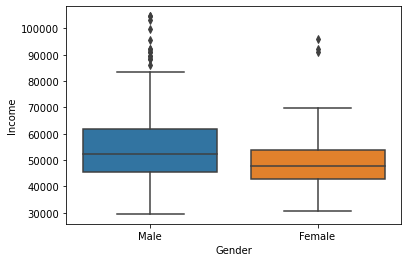

In [56]:
sns.boxplot(x = 'Gender', y = 'Income', data=df_aerofit) 

In [57]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [60]:
income_male

0       29562
1       31836
3       32973
4       35247
7       32973
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 104, dtype: int64

In [61]:
income_female

2      30699
5      32973
6      35247
9      37521
11     35247
       ...  
152    61006
157    69721
162    92131
167    90886
171    95866
Name: Income, Length: 76, dtype: int64

In [62]:
income_male.mean()

56562.75961538462

In [63]:
income_female.mean()

49828.90789473684

In [64]:
## H0 : male income = female income
## HA : male income != female income

ttest_ind(income_male, income_female)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

In [65]:
t_test_stat, p_value = ttest_ind(income_male, income_female)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("failed to reject H0")

0.006527263097214258
Reject H0


In [66]:
t_test_stat, p_value = ttest_ind(income_male, income_female, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("failed to reject H0")

0.003263631548607129
Reject H0


In [67]:
t_test_stat, p_value = ttest_ind(income_male, income_female, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("failed to reject H0")

0.9967363684513929
failed to reject H0


In [68]:
ttest_ind_from_stats(
    income_male.mean(),
    income_male.std(),
    len(income_male),
    income_female.mean(),
    income_female.std(),
    len(income_female),
)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

## Income vs Product

<AxesSubplot:xlabel='Product', ylabel='Income'>

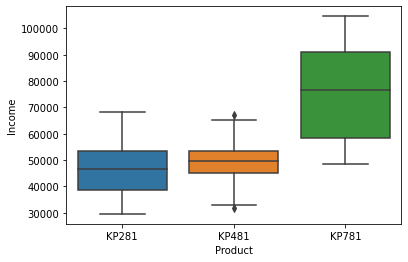

In [70]:
sns.boxplot(x='Product', y = 'Income', data = df_aerofit)

In [71]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [72]:
income_kp281.mean()

46418.025

In [73]:
income_kp481.mean()

48973.65

In [74]:
income_kp781.mean()

75441.575

In [75]:
ttest_ind(income_kp481, income_kp781)

Ttest_indResult(statistic=-9.628009470104807, pvalue=7.770191623361293e-16)

In [76]:
ttest_ind(income_kp281, income_kp481)

Ttest_indResult(statistic=-1.6817688139914835, pvalue=0.09487529747264932)

## ANOVA :

In [ ]:
# Analysis of Variance

In [79]:
# H0 : All three have same mean
# HA : At least one is diff. than other

f_oneway(income_kp281, income_kp481, income_kp781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

# Gender vs Product

In [90]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],
            columns=df_aerofit['Product'])

In [91]:
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [92]:
chi2_contingency(gender_product)

(12.923836032388664,
 0.0015617972833158714,
 2,
 array([[33.77777778, 25.33333333, 16.88888889],
        [46.22222222, 34.66666667, 23.11111111]]))

## Gender vs Platform

In [84]:
observed = [
    [527, 72],
    [206, 102]
]

In [89]:
# H0 : Gender has no effect on Platfom preference 

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed)
print(p_value)
print(exp_freq)

4.268230756875865e-14
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]


In [93]:
chi2_contingency(observed)

(57.04098674049609,
 4.268230756875865e-14,
 1,
 array([[484.08710033, 114.91289967],
        [248.91289967,  59.08710033]]))